Import Libraries

In [15]:
import csv
from pprint import pprint
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd
import pickle

Functions

In [16]:
def cart2pol(x, y):
    rho = np.sqrt(x**2 + y**2)
    phi = np.arctan2(y, x)
    return(rho, phi)

def pol2cart(rho, phi):
    x = rho * np.cos(phi)
    y = rho * np.sin(phi)
    return(x, y)

# THIS IS A FUNCITON YOU CAN CALL FROM OTHER PLACES TO GET THE DATA 
def CSV_Read_Lidar_data(data_path):
    rows = []
    with open(data_path, 'r') as file:
        csvreader = csv.reader(file)
        header = next(csvreader)
        for row in csvreader:
            rows.append(row)
    return header, rows

Read the CSV File

In [17]:
rows = []
file_path = 'Data/'
file_name = 'DownstairsScan_not_move'
with open(file_path+file_name+'.csv', 'r') as file:
    csvreader = csv.reader(file)
    header = next(csvreader)
    for row in csvreader:
        rows.append(row)
print("test")

headers = np.array(header).T


test


Create pd Series and DataFrames

In [18]:
# Create a Series for the header
header_names = ['angle_min', 'angle_max', 'angle_increment', 'time_increment', 'scan_time', 'range_min', 'range_max']
Header_info = pd.DataFrame(headers, header_names).astype(float)
Header_info

,0
angle_min,-3.124139
angle_max,3.141593
angle_increment,0.005807
time_increment,0.000113
scan_time,0.122276
range_min,0.150000
range_max,12.000000


In [19]:
# create a lidar rho dataframe
translation_df = pd.DataFrame(np.array(rows[1::5]))
translation_df = translation_df.T
translation_df

,0,1,2,3,4,5,6,7,8,9,...,72,73,74,75,76,77,78,79,80,81
0,-0.7431087260419579,-0.7431087260419579,-0.7431087260419579,-0.7431087260419579,-0.7431087260419579,-0.7431087260419579,-0.7431087260419579,-0.7431087260419579,-0.7431087260419579,-0.7431087260419579,...,-0.7431087260419579,-0.7431087260419579,-0.7431087260419579,-0.7431087260419579,-0.7431087260419579,-0.7431087260419579,-0.7431087260419579,-0.7431087260419579,-0.7431087260419579,-0.7431087260419579
1,-0.3487675667616497,-0.3487675667616497,-0.3487675667616497,-0.3487675667616497,-0.3487675667616497,-0.3487675667616497,-0.3487675667616497,-0.3487675667616497,-0.3487675667616497,-0.3487675667616497,...,-0.3487675667616497,-0.3487675667616497,-0.3487675667616497,-0.3487675667616497,-0.3487675667616497,-0.3487675667616497,-0.3487675667616497,-0.3487675667616497,-0.3487675667616497,-0.3487675667616497
2,0.08082633934240127,0.08082633934240127,0.08082633934240127,0.08082633934240127,0.08082633934240127,0.08082633934240127,0.08082633934240127,0.08082633934240127,0.08082633934240127,0.08082633934240127,...,0.08082633934240127,0.08082633934240127,0.08082633934240127,0.08082633934240127,0.08082633934240127,0.08082633934240127,0.08082633934240127,0.08082633934240127,0.08082633934240127,0.08082633934240127
3,0.0007169012923446283,0.0007169012923446283,0.0007169012923446283,0.0007169012923446283,0.0007169012923446283,0.0007169012923446283,0.0007169012923446283,0.0007169012923446283,0.0007169012923446283,0.0007169012923446283,...,0.0007169012923446283,0.0007169012923446283,0.0007169012923446283,0.0007169012923446283,0.0007169012923446283,0.0007169012923446283,0.0007169012923446283,0.0007169012923446283,0.0007169012923446283,0.0007169012923446283
4,0.0019515493431825886,0.0019515493431825886,0.0019515493431825886,0.0019515493431825886,0.0019515493431825886,0.0019515493431825886,0.0019515493431825886,0.0019515493431825886,0.0019515493431825886,0.0019515493431825886,...,0.0019515493431825886,0.0019515493431825886,0.0019515493431825886,0.0019515493431825886,0.0019515493431825886,0.0019515493431825886,0.0019515493431825886,0.0019515493431825886,0.0019515493431825886,0.0019515493431825886
5,-0.7050467993776937,-0.7050467993776937,-0.7050467993776937,-0.7050467993776937,-0.7050467993776937,-0.7050467993776937,-0.7050467993776937,-0.7050467993776937,-0.7050467993776937,-0.7050467993776937,...,-0.7050467993776937,-0.7050467993776937,-0.7050467993776937,-0.7050467993776937,-0.7050467993776937,-0.7050467993776937,-0.7050467993776937,-0.7050467993776937,-0.7050467993776937,-0.7050467993776937
6,0.7091577315343663,0.7091577315343663,0.7091577315343663,0.7091577315343663,0.7091577315343663,0.7091577315343663,0.7091577315343663,0.7091577315343663,0.7091577315343663,0.7091577315343663,...,0.7091577315343663,0.7091577315343663,0.7091577315343663,0.7091577315343663,0.7091577315343663,0.7091577315343663,0.7091577315343663,0.7091577315343663,0.7091577315343663,0.7091577315343663


In [20]:
# create a lidar rho dataframe
rho_df = pd.DataFrame(np.array(rows[3::5]))
rho_df = rho_df.T
rho_df

,0,1,2,3,4,5,6,7,8,9,...,72,73,74,75,76,77,78,79,80,81
0,1.4040000438690186,1.4040000438690186,1.4040000438690186,1.4040000438690186,1.4040000438690186,1.4040000438690186,1.4040000438690186,1.4040000438690186,1.4040000438690186,1.4040000438690186,...,1.4040000438690186,1.4040000438690186,1.4040000438690186,1.4040000438690186,1.4040000438690186,1.4040000438690186,1.4040000438690186,1.4040000438690186,1.4040000438690186,1.4040000438690186
1,1.4040000438690186,1.4040000438690186,1.4040000438690186,1.4040000438690186,1.4040000438690186,1.4040000438690186,1.4040000438690186,1.406000018119812,1.4040000438690186,1.4040000438690186,...,1.4040000438690186,1.4040000438690186,1.4040000438690186,1.4040000438690186,1.4040000438690186,1.4040000438690186,1.4040000438690186,1.4040000438690186,1.4040000438690186,1.4040000438690186
2,1.406000018119812,1.4040000438690186,1.4040000438690186,1.4040000438690186,1.4040000438690186,1.4040000438690186,1.4040000438690186,1.406000018119812,1.406000018119812,1.4040000438690186,...,1.406000018119812,1.4040000438690186,1.4040000438690186,1.406000018119812,1.4040000438690186,1.4040000438690186,1.4040000438690186,1.4040000438690186,1.4040000438690186,1.4040000438690186
3,1.406000018119812,1.406000018119812,1.406000018119812,1.406000018119812,1.406000018119812,1.406000018119812,1.406000018119812,1.406000018119812,1.4040000438690186,1.406000018119812,...,1.406000018119812,1.4040000438690186,1.406000018119812,1.4040000438690186,1.406000018119812,1.406000018119812,1.406000018119812,1.406000018119812,1.406000018119812,1.406000018119812
4,1.4040000438690186,1.406000018119812,1.406000018119812,1.406000018119812,1.406000018119812,1.4040000438690186,1.406000018119812,1.4040000438690186,1.406000018119812,1.406000018119812,...,1.406000018119812,1.406000018119812,1.406000018119812,1.406000018119812,1.406000018119812,1.4040000438690186,1.406000018119812,1.406000018119812,1.406000018119812,1.4040000438690186
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,1.4019999504089355,1.4019999504089355,1.4040000438690186,1.4040000438690186,1.4019999504089355,1.4019999504089355,1.4040000438690186,1.4019999504089355,1.4019999504089355,1.4019999504089355,...,1.4040000438690186,1.4040000438690186,1.4019999504089355,1.4040000438690186,1.4040000438690186,1.4040000438690186,1.4040000438690186,1.4019999504089355,1.4040000438690186,1.4040000438690186
1076,1.4019999504089355,1.4019999504089355,1.4019999504089355,1.4019999504089355,1.4019999504089355,1.4019999504089355,1.4019999504089355,1.4019999504089355,1.4019999504089355,1.4019999504089355,...,1.4019999504089355,1.4019999504089355,1.4019999504089355,1.4019999504089355,1.4019999504089355,1.4019999504089355,1.4019999504089355,1.4019999504089355,1.4019999504089355,1.4019999504089355
1077,1.4019999504089355,1.4019999504089355,1.4019999504089355,1.4019999504089355,1.4019999504089355,1.4019999504089355,1.4019999504089355,1.4019999504089355,1.4019999504089355,1.4019999504089355,...,1.4019999504089355,1.4019999504089355,1.4019999504089355,1.4019999504089355,1.4019999504089355,1.4019999504089355,1.4019999504089355,1.4019999504089355,1.4019999504089355,1.4019999504089355
1078,1.4040000438690186,1.4040000438690186,1.4040000438690186,1.4040000438690186,1.4040000438690186,1.4040000438690186,1.4040000438690186,1.4040000438690186,1.4040000438690186,1.4040000438690186,...,1.4040000438690186,1.4040000438690186,1.4040000438690186,1.4040000438690186,1.4040000438690186,1.4040000438690186,1.4040000438690186,1.4040000438690186,1.4040000438690186,1.4040000438690186


In [21]:
# create a dataframe of the radian alphas
alpha_df = pd.DataFrame()

for i in range(rho_df.shape[1]):
    # Header_info.loc['angle_increment'][i] * np.arange(1, 1081)
    alpha_df[i] = Header_info.loc['angle_increment'][0] * np.arange(1, 1081) - math.pi/2
# alpha_df = alpha_df.transpose().drop(del_indexes, axis=1).transpose()
alpha_df

,0,1,2,3,4,5,6,7,8,9,...,72,73,74,75,76,77,78,79,80,81
0,-1.564989,-1.564989,-1.564989,-1.564989,-1.564989,-1.564989,-1.564989,-1.564989,-1.564989,-1.564989,...,-1.564989,-1.564989,-1.564989,-1.564989,-1.564989,-1.564989,-1.564989,-1.564989,-1.564989,-1.564989
1,-1.559182,-1.559182,-1.559182,-1.559182,-1.559182,-1.559182,-1.559182,-1.559182,-1.559182,-1.559182,...,-1.559182,-1.559182,-1.559182,-1.559182,-1.559182,-1.559182,-1.559182,-1.559182,-1.559182,-1.559182
2,-1.553375,-1.553375,-1.553375,-1.553375,-1.553375,-1.553375,-1.553375,-1.553375,-1.553375,-1.553375,...,-1.553375,-1.553375,-1.553375,-1.553375,-1.553375,-1.553375,-1.553375,-1.553375,-1.553375,-1.553375
3,-1.547568,-1.547568,-1.547568,-1.547568,-1.547568,-1.547568,-1.547568,-1.547568,-1.547568,-1.547568,...,-1.547568,-1.547568,-1.547568,-1.547568,-1.547568,-1.547568,-1.547568,-1.547568,-1.547568,-1.547568
4,-1.541761,-1.541761,-1.541761,-1.541761,-1.541761,-1.541761,-1.541761,-1.541761,-1.541761,-1.541761,...,-1.541761,-1.541761,-1.541761,-1.541761,-1.541761,-1.541761,-1.541761,-1.541761,-1.541761,-1.541761
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,4.677514,4.677514,4.677514,4.677514,4.677514,4.677514,4.677514,4.677514,4.677514,4.677514,...,4.677514,4.677514,4.677514,4.677514,4.677514,4.677514,4.677514,4.677514,4.677514,4.677514
1076,4.683321,4.683321,4.683321,4.683321,4.683321,4.683321,4.683321,4.683321,4.683321,4.683321,...,4.683321,4.683321,4.683321,4.683321,4.683321,4.683321,4.683321,4.683321,4.683321,4.683321
1077,4.689128,4.689128,4.689128,4.689128,4.689128,4.689128,4.689128,4.689128,4.689128,4.689128,...,4.689128,4.689128,4.689128,4.689128,4.689128,4.689128,4.689128,4.689128,4.689128,4.689128
1078,4.694935,4.694935,4.694935,4.694935,4.694935,4.694935,4.694935,4.694935,4.694935,4.694935,...,4.694935,4.694935,4.694935,4.694935,4.694935,4.694935,4.694935,4.694935,4.694935,4.694935


In [22]:
def flatten_extend(matrix):
    flat_list = []
    for row in matrix:
        flat_list.extend(row)
    return flat_list

del_indexes = np.array(list(rho_df[0][rho_df[0].astype(float) <= 1.4].index))
del_indexes


array([], dtype=float64)

In [23]:
# Create the cartesasion dataset, combine with the polar, then save into a new dataset
all_data_df = []


for i in range(alpha_df.shape[1]):

    cartesian_df = pd.DataFrame(pol2cart(rho_df[i].astype(float), alpha_df[i].astype(float)), ['X', 'Y'])
    alpha_rho_df = pd.DataFrame(cart2pol(rho_df[i].astype(float), alpha_df[i].astype(float)), ['Rho', 'Alpha'])

    #Finally combine the xy data and alpha rho data
    combined_df = pd.concat([alpha_rho_df, cartesian_df])
    combined_df = combined_df.drop(del_indexes, axis=1)
    combined_df = combined_df.T.reset_index(drop=True)
    all_data_df.append(combined_df)



In [24]:
all_data_df[0]

,Rho,Alpha,X,Y
0,2.102477,-0.839569,0.008153,-1.403976
1,2.098158,-0.837721,0.016306,-1.403905
2,2.095188,-0.835157,0.024493,-1.405787
3,2.090886,-0.833293,0.032656,-1.405621
4,2.085244,-0.832130,0.040759,-1.403408
...,...,...,...,...
1075,4.883108,1.279586,-0.048884,-1.401147
1076,4.888671,1.279927,-0.040747,-1.401408
1077,4.894234,1.280267,-0.032609,-1.401621
1078,4.900371,1.280215,-0.024504,-1.403786


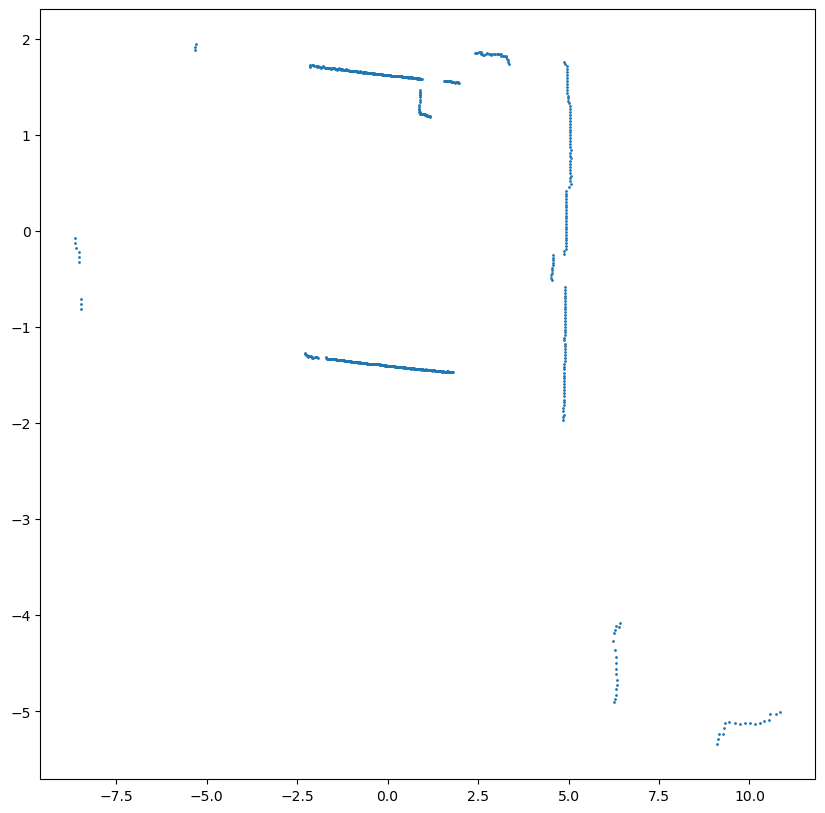

In [25]:
plt_idx = 0

plt.figure(figsize=(10, 10))
plt.scatter(all_data_df[plt_idx]['X'], all_data_df[plt_idx]['Y'], s=1)
plt.show()


In [26]:
# write to csv
addition = '_scan_data_organized'

# Save data
tmp_df = pd.DataFrame()

for i in range(len(all_data_df)):
    tmp_df = pd.concat([tmp_df, all_data_df[i]])
tmp_df = tmp_df
tmp_df.to_pickle(file_path + file_name + addition + '.pkl')

In [27]:
# # Load datapath and put into dataframe
# # path to csv data
# data_path = 'Data_Readers_Writers/Data/Hallway_Lidar_data_dinosars2_scan_data_organized.csv'
# tmp_df = pd.read_csv(data_path)

# #read and turn to list
# lowrange = 0
# highrange = 1070

# scan_df = []
# for i in range(int(tmp_df.shape[0]/1070)):
#     lowrange = lowrange + 1070 * i
#     highrange = highrange + 1070 * i
#     scan_df.append(tmp_df.iloc[lowrange:highrange, :])

# # Delete any column that has an inf in the rho spot
# for i in range(len(scan_df)):
#     inf_cols = scan_df[i]['Rho'][np.isfinite(scan_df[i]['Rho'])]
#     # print(inf_cols.index)
#     scan_df[i] = scan_df[i].T[inf_cols.index].T.reset_index(drop=True)
# scan_df[2]
